In [52]:
from matplotlib import pyplot as plt
import random

def perform_show(N, K): #Execute the simulation of 1 Monty Hall Problem (MHP) with N doors, K of which are opened

    available_doors = [list(range(N)) for n in range(3)] # [[0, 1, 2, ... , N-1], [], []] List of the available doors initially available for each player
    winning_doors = [random.randint(0, N-1) for n in range(3)] # [wd_0, wd_1, wd_2] Generate the winning door, for every player. Doors are numbered starting from 0 up to N-1
    #We have to simulate this for each palyer separately, therefore perform_show() actually runs the expriment 3 times

    players_choices = [random.randint(0, N-1) for n in range(3)] # [pc_0, pc_1, pc_2] Generate the choice of each player (in their own simulations). Player 2 (index 2) will be overwritten

    #Player 0: Conservative
    #Player 1: Switcher
    #Player 2: Newcomer

    doors_available_to_be_opened = [list(range(N)) for n in range(3)] #Like available_doors
    for i in range(2): #The doors availabe to be opened should be those that haven't been choosen and are not the winning ones
        doors_available_to_be_opened[i].remove(players_choices[i])
        if winning_doors[i] in doors_available_to_be_opened[i]: doors_available_to_be_opened[i].remove(winning_doors[i]) #This is just to handle the case when the winning door coincides with the choosen one, which would throw an exception
    doors_available_to_be_opened[2].remove(winning_doors[2]) #Since he choose after the opening, we should remove only the winning door from the door set of the Newcomer (player 2)

    opened_doors = [random.sample(doors_available_to_be_opened[i], K) for i in range(3)] # [[od_0, od_1, od_2, ... ,od_(K-1)], [], []] Generate the opened doors, for every player (always separately), sampling from the doors_available_to_be_opened
    
    for i in range (3):
        for j in range(K):
            available_doors[i].remove(opened_doors[i][j]) # [[0, 1, 2, ... , N-K-1], [], []] From the available doors for the i-th player, remove the doors that have been opened
    
    available_doors[1].remove(players_choices[1]) #From the available doors of the Switcher (player 2) remove his first choice

    players_choices[2] = available_doors[2][random.randint(0, N-K-1)] #Newcomer (player 2) makes his choice. His choice his among one of the availabe doors to him, which are N-K. Therefore he can choose one door from the 0-th to the (N-K-1)-th among his N-K available doors
    while players_choices[2] in opened_doors[2]: #But obviously he doesn't choose the opened door (of his simulation)
        players_choices[2] = available_doors[2][random.randint(0, N-K-1)]

    switcher_first_choice = players_choices[1]

    while (players_choices[1] == switcher_first_choice) or (players_choices[1] in opened_doors[1]): #Switcher (player 1) switches door, choosing between his available doors. Note that the number of available doors for him his N-K-1 betcause we have to discard his first choice
        players_choices[1] = available_doors[1][random.randint(0, N-K-2)]
                                                
    winners = [] #Boolean array where we store the winners of the simulation

    for i in range(len(players_choices)):
        if players_choices[i] == winning_doors[i]: #If player i-th got the right door in his simulation (the i-th simulation)
            winners.append(True) #Then append True to our growing list
        else:
            winners.append(False) #Else append False

    return winners #[Bool, Bool, Bool]

def winning_probability(N, K, pl_type="s"): #Returns the expected probability of success for the specified type of player
    prob = 0
    if (pl_type.lower() == "conservative") or (pl_type.lower() == "c"):
        prob = 1 / N
    elif (pl_type.lower() == "switcher") or (pl_type.lower() == "s"):
        prob = (1 / N) * (N - 1) / (N - K - 1)
    elif (pl_type.lower() == "newcomer") or (pl_type.lower() == "n"):
        prob = 1 / (N - K)
    return prob
    

In [53]:
players_win_count = [0, 0, 0] #Count of the wins of every type of player: "Conservative", "Switcher", "Newcomer"
winners = [] #This will store the outcome of every simulation [[Bool, Bool, Bool], [Bool, Bool, Bool], [Bool, Bool, Bool], ...]

doors_number = 3 #N
opened_doors_number = 1 #K, maximum value is N-2
simulations_number = 2524 #Number of simulations to be executed

for i in range(simulations_number):
    winners.append(perform_show(doors_number, opened_doors_number)) #Store the result of every simulation
    for j in range(len(winners[i])):
        if winners[i][j] == True: #Count the wins of every type of player
            players_win_count[j] += 1

print("Victories of every type of player: " + str(players_win_count)) #Prints the number of wins of every type of player: "Conservative", "Switcher", "Newcomer"

Victories of every type of player: [880, 1693, 1227]


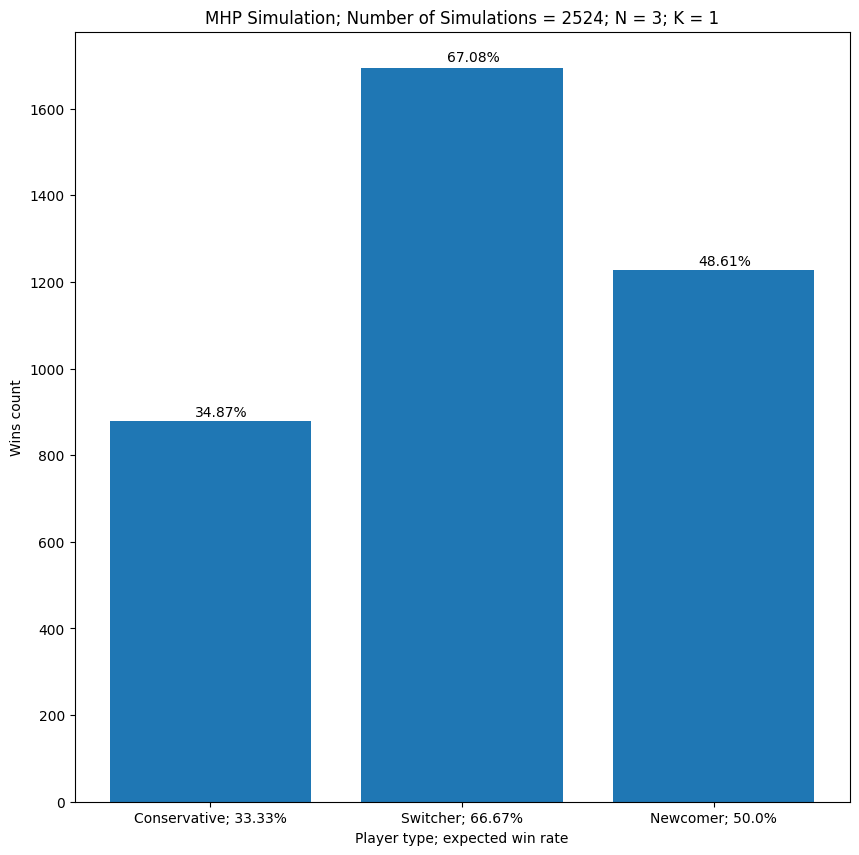

In [54]:
players_bins = ["Conservative", "Switcher", "Newcomer"]
for p_t in players_bins: players_bins[players_bins.index(p_t)] += "; " + str(round(winning_probability(doors_number, opened_doors_number, p_t) * 100, 2)) + "%" #Attaching the expected win rate to the name of the bars

fig, ax = plt.subplots(figsize =(10, 10))
ax.bar(players_bins, players_win_count)
ax.set_title("MHP Simulation; Number of Simulations = " + str(simulations_number) + "; N = " + str(doors_number) + "; K = " + str(opened_doors_number))
ax.set_xlabel("Player type; expected win rate")
ax.set_ylabel("Wins count")

for i in ax.patches: #Adding labels for winning rates
    text = str(round((i.get_height()/simulations_number)*100, 2)) + "%"
    plt.text(i.get_x()+i.get_width()/2*(1-2/13), i.get_height()*(1+0.01), text) #Label positioning

plt.show()